# Analysis and Prediction-Indian Liver Patients.

The dataset was downloaded from the UCI ML Repository.
https://www.kaggle.com/uciml/indian-liver-patient-records

Here are the steps you are going to perform:  
1. **Data Preprocessing**: Inspect the data: Check whether there is any missing data, irrelevant data and do a cleanup.  
2. **Data Visualization**: We have graphed correlations between features for you, your job is to identify correlations and understand each feature
3.  **Feature selection**: Identify correlations and drop unneeded columns based on part 2 
4. **Machine Learning**: create a models to predict whether the patient can be identified to be having liver disease or not. Select the best of three and improve the model's accuracy.

In [0]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing

In [0]:
#Read the training & test data
liver_df = pd.read_csv('indian_liver_patient.csv')

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). 

In [3]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:   
1) Only gender is non-numeric veriable. All others are numeric.   
2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.






In [0]:
# You code here
# remove any null values
# Make sure you drop the individuals rows with null values and not the entire column.

In [5]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


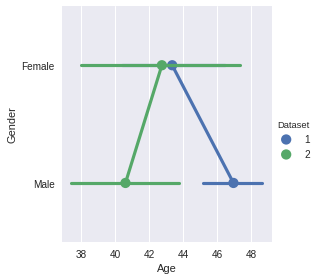

In [29]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

Age correlation for liver disease for both male and female genders

In [0]:
# How many patients of each gender have liver/don't have liver disease?
# hint: use pandas groupby & count

**Q1) How many patients of each gender have liver/don't have liver disease?**

In [0]:
# What is the average age of patient for liver disease based on gender?
# hint: use pandas groupby & mean

**Q2) What is the average age of patient for liver disease based on gender?**

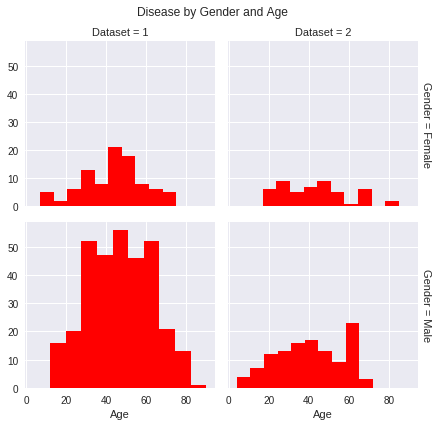

In [9]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

Gender and Age

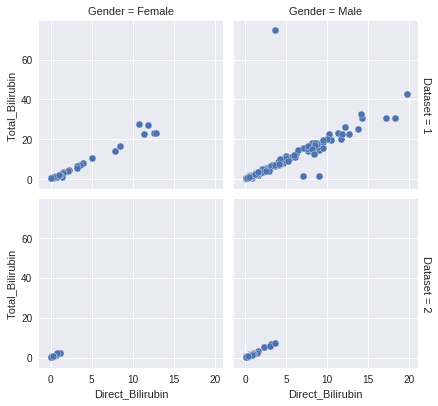

In [10]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

 Total_Bilirubin and Direct_Bilirubin

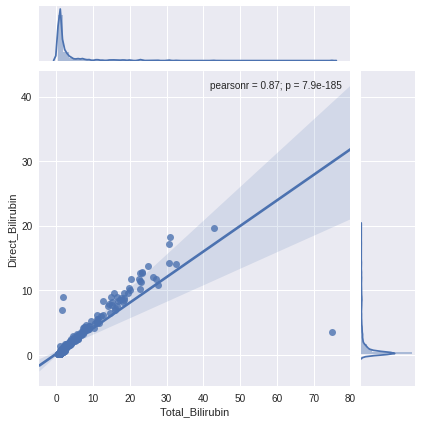

In [11]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

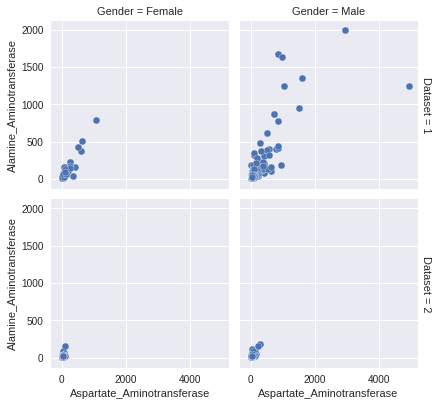

In [12]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender.

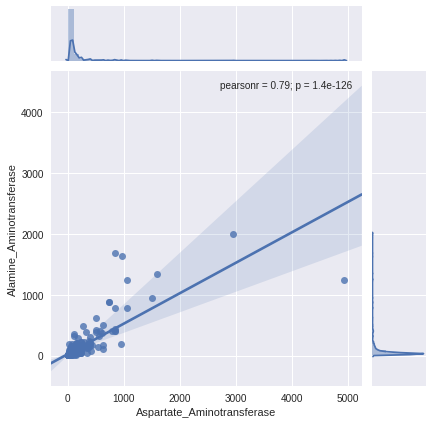

In [13]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

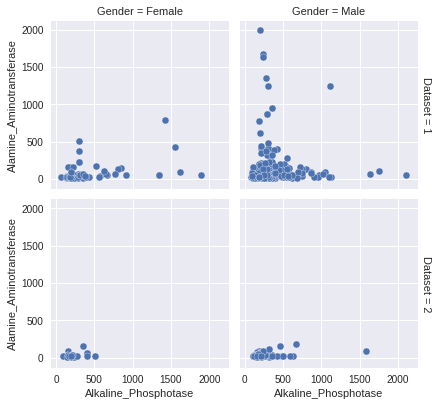

In [14]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

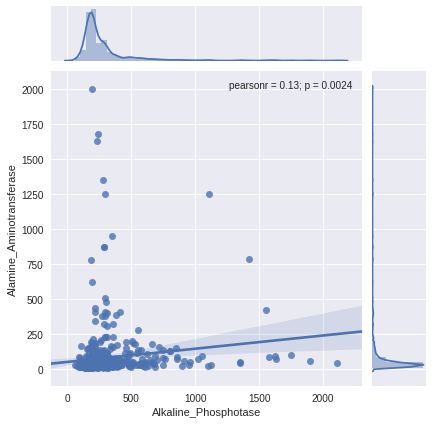

In [15]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

Alkaline_Phosphotase and Alamine_Aminotransferase

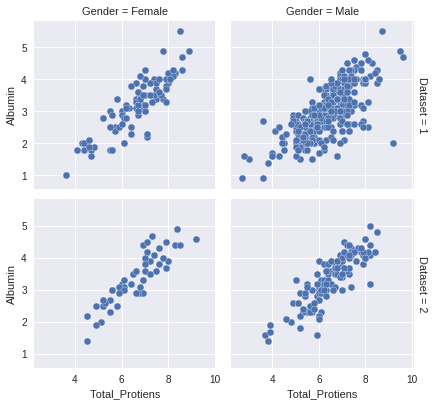

In [16]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Total_Protiens and Albumin and the gender.

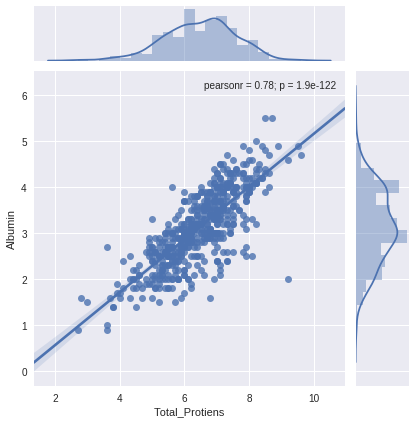

In [17]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

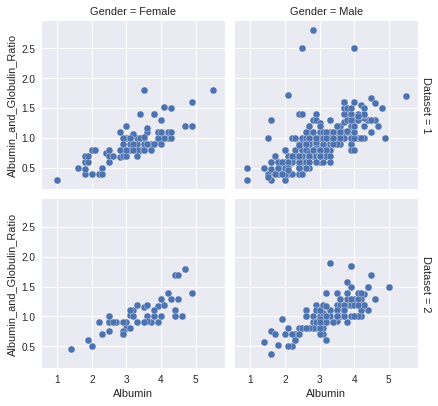

In [18]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Albumin_and_Globulin_Ratio and Albumin.

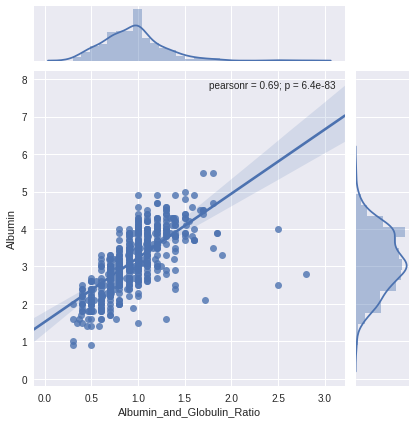

In [19]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

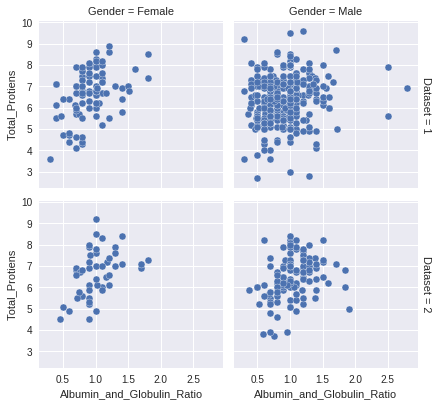

In [20]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Total Protein and Albumin and Globuilin Ratio

**Q3) What linear corerelation between distinct features are there?**

1.   (Hint there are 4 distinct ones!)
2.   We will be dropping duplicate correlated features in feature selection



# Feature selection:

**Q4) Convert categorical variable (objects) "Gender" to indicator variables 0 & 1**

1.   We can only correlate numerical values





In [0]:
# hint use get_dummies in pandas

In [0]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [0]:
# Correlation
liver_corr = liver_df.corr()

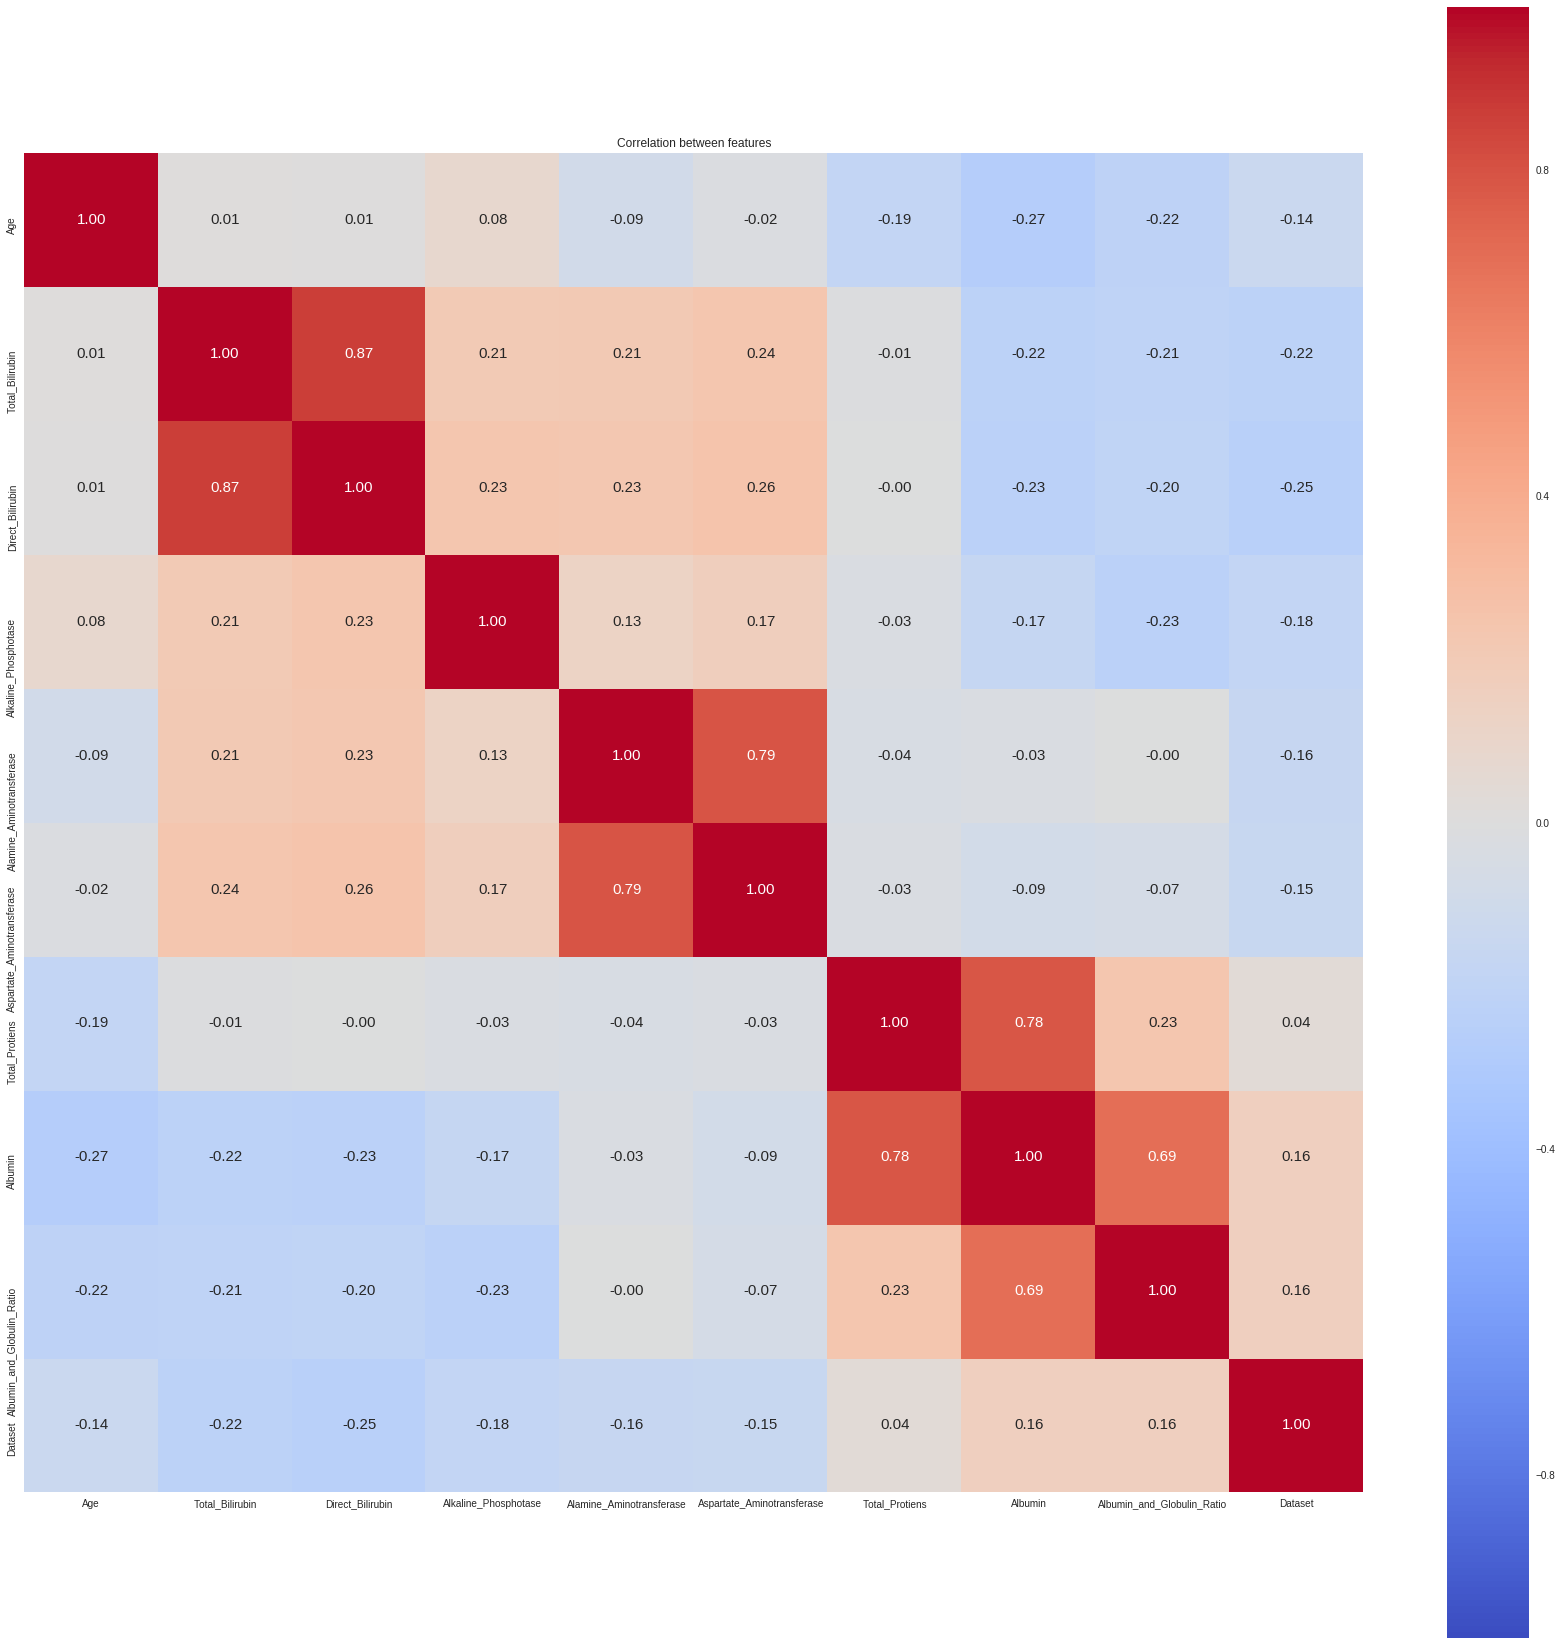

In [24]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [0]:
# Q3 results should match with these results
# any correlation that above 0.6 between different variables is a good sign of linear correlation


**Q5) Drop the duplicate features that are linearlly correlated from the dataset you are using to test/train your model**

In [0]:
# Q4 CODE HERE

# Machine Learning

In [0]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [28]:
# randomly determine subsets for training/testing data, test_size is 30%, training size is 70%, seed of 101 for validation
# X is dataset variable, replace with if you named it something else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

NameError: ignored

**Q6) Create a Logistic Regression (Don't worrying about tuning now, use the defaults)**


1.   What is your training score?
2.   What is your test score?
3.  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html





In [0]:
#2) Logistic Regression
# Create logistic regression object

# Train the model using the training sets and check score

#Predict Output


#get training & test scores


**Q7) Create a Naive Bayes Classifier (Don't worrying about tuning now, use the defaults**


1.   What is your training score?
2.   What is your test score?
3. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


In [0]:
# Gaussian Naive Bayes
# same steps as above but use the GuassianNB classifier

**Q8) Create a Random forest classifier (Don't worrying about tuning now, set n_estimaters to 100 (default in v0.20)**


1.   What is your training score?
2.   What is your test score?
3. http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [0]:
# Random Forest

In [37]:
#Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
# you may have to change the variable names if you named them something else
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

NameError: ignored

In [215]:
#select the best model and see what the top three features are
from sklearn.feature_selection import RFE
# rfe =RFE(# variable containing best model here here, n_features_to_select=3)
rfe.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=3, step=1, verbose=0)

In [214]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

Total_Protiens
Albumin
Gender_Male


In [0]:
#Simplier models may yield better accuracy, especially when correlation isn't strong with additional features
# lets try pruning the top three features
# finX = # YOUR CODE HERE - top three features
# finX.head(4) check to see three rows

In [0]:
# use new sample data with less features to train new model
X_train, X_test, y_train, y_test = train_test_split(finX, y, test_size=0.30, random_state=101)

**Q9) Tune your classifier**


1.   What is your training score?
2.   What is your test score?
3. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [0]:
#  Your best model model here

# Citation

Inspiration taken from: https://www.kaggle.com/sanjames/liver-patients-analysis-prediction-accuracy